In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris



In [9]:
file_path_with_infertility="PCOS_infertility.csv"
file_path_without_infertility="PCOS_data_without_infertility.xlsx"



In [10]:
PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [11]:
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head() 

C:\Users\user5\AppData\Local\Temp\ipykernel_15544\1829610426.py:1: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [13]:
#Having a look at the data with dtype objects

data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [14]:
#Similarly

data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [15]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]



In [16]:
# Having a look at some basic statistical details.

data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


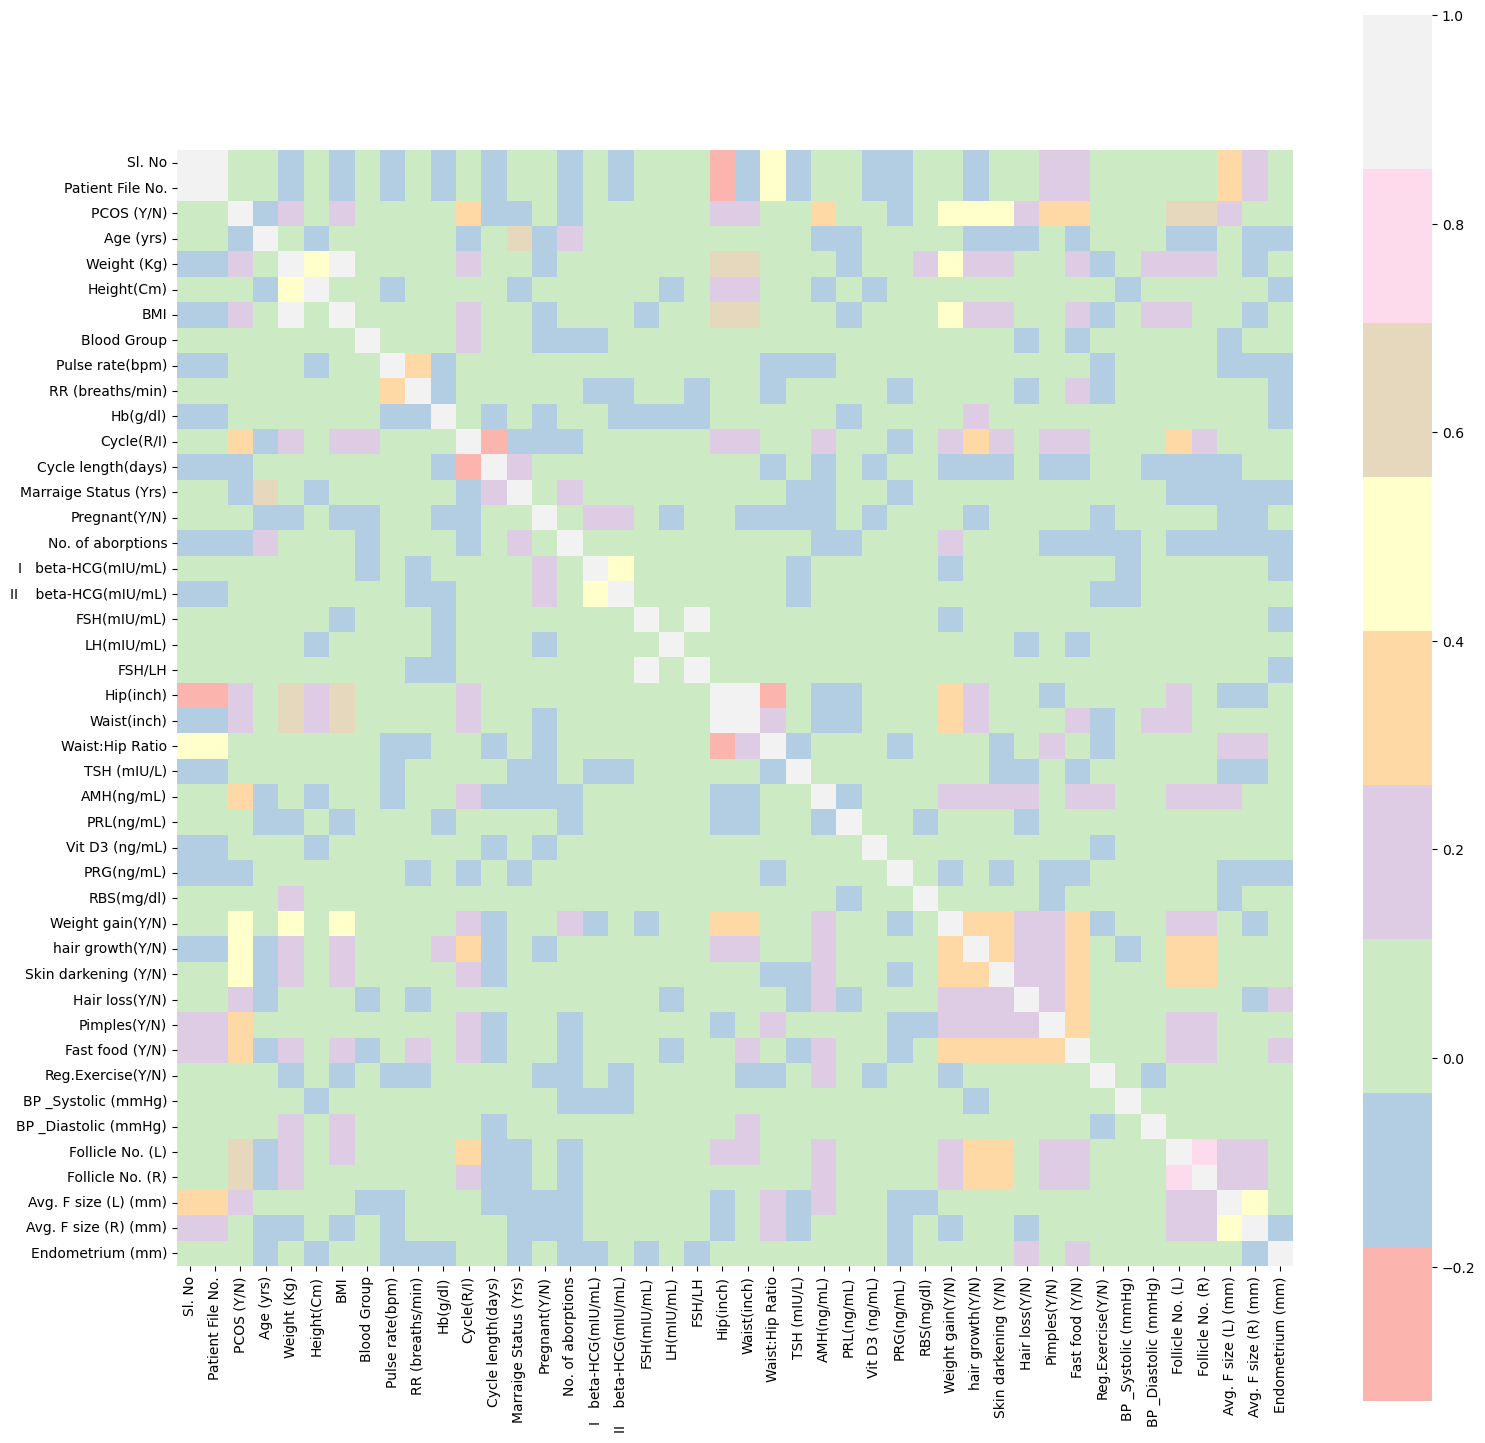

In [17]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [18]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Sl. No                    0.060998
Patient File No.          0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)    

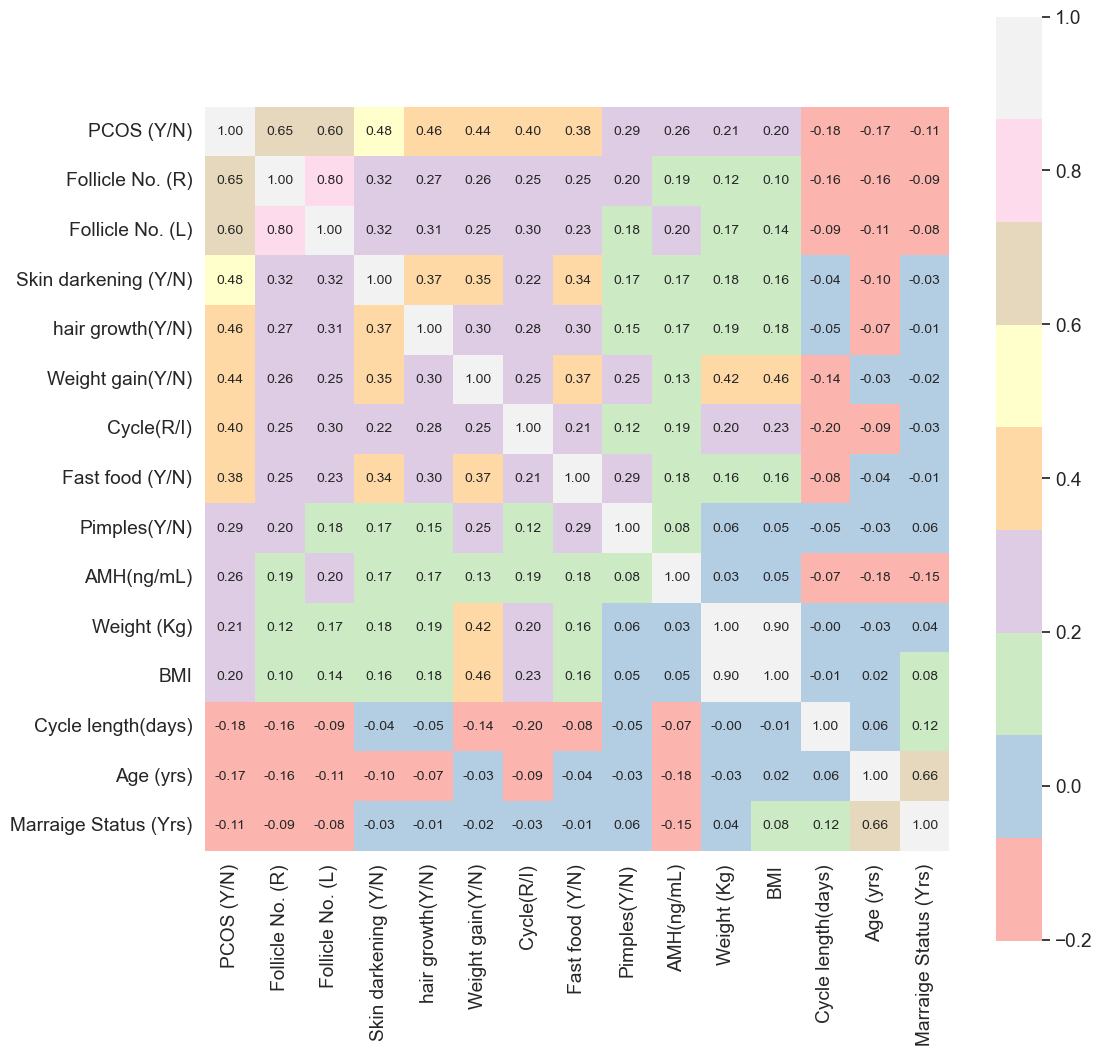

In [19]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\user5\bhagya\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


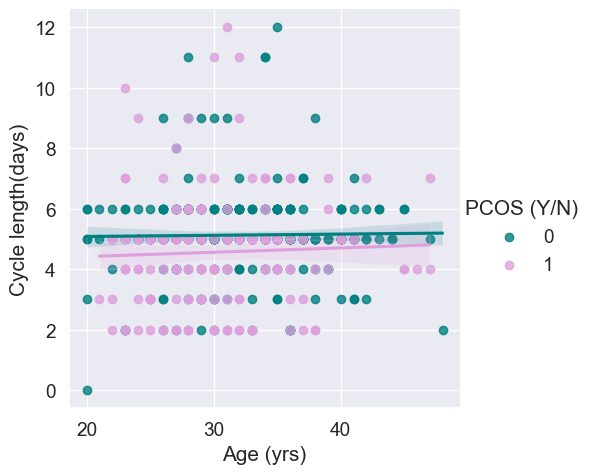

In [20]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

C:\Users\user5\bhagya\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


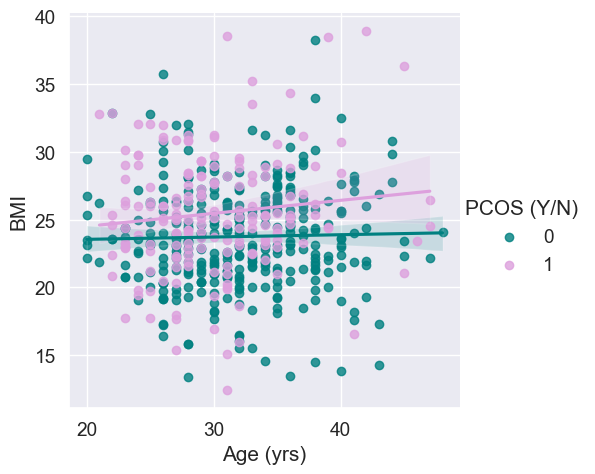

In [21]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

C:\Users\user5\bhagya\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


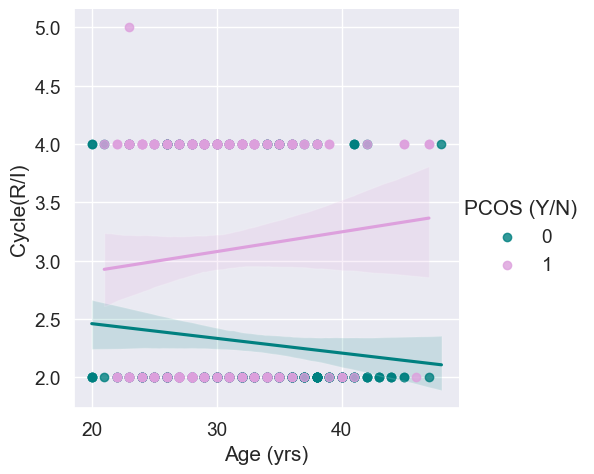

In [22]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

C:\Users\user5\bhagya\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


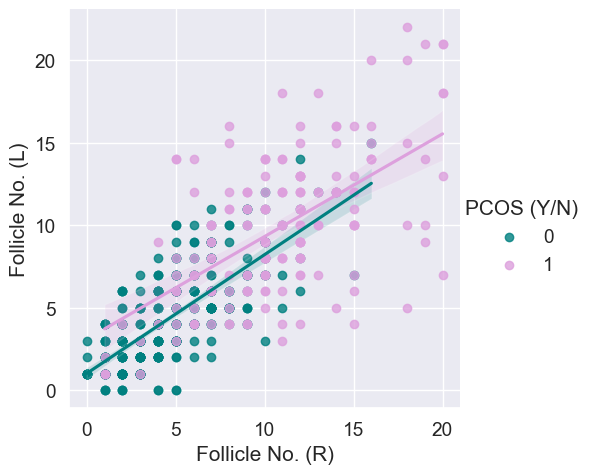

In [23]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


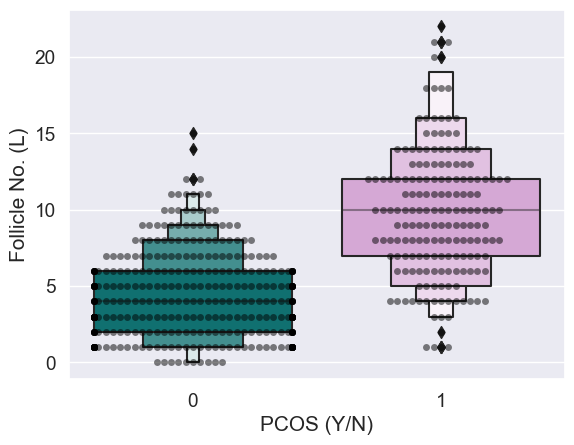

C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


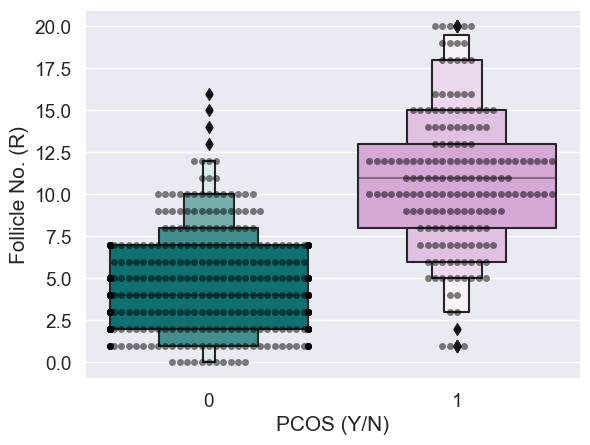

In [24]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

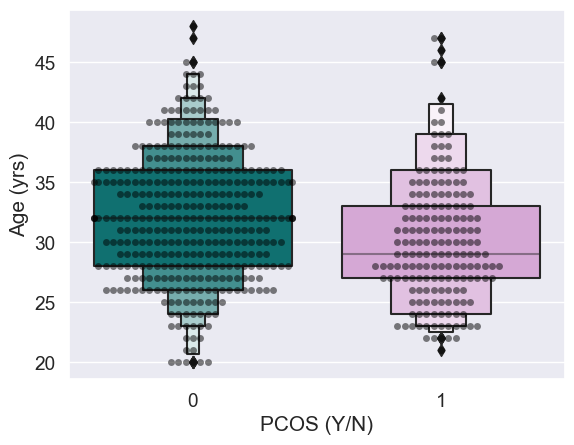

C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


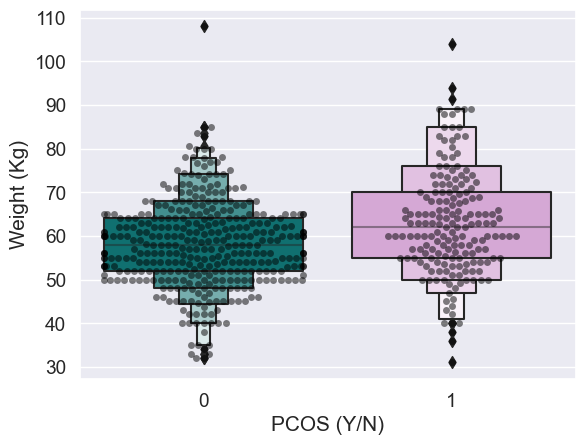

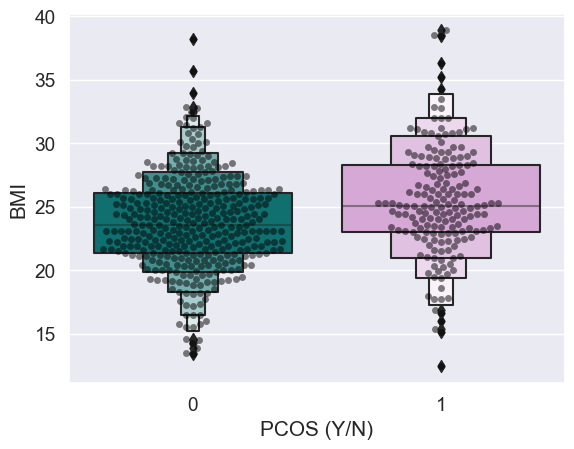

C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


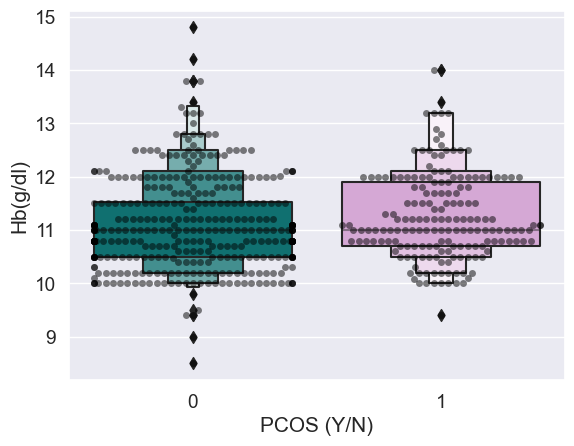

C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


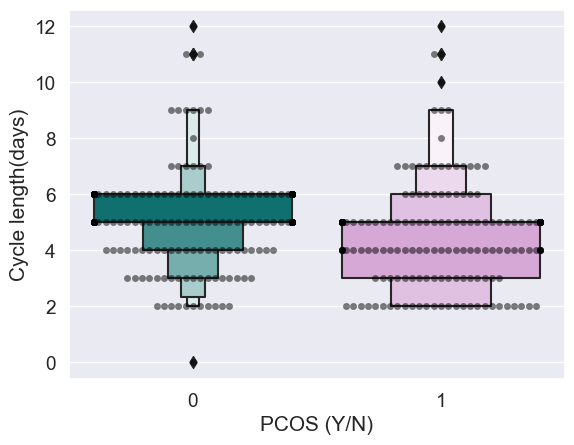

C:\Users\user5\bhagya\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


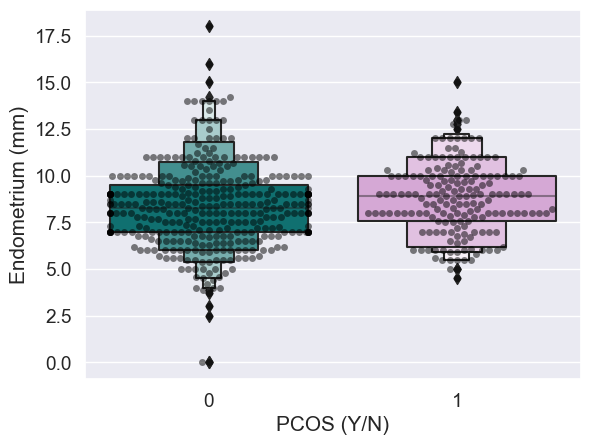

In [25]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

In [26]:
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

In [27]:
#Fitting the RandomForestClassifier to the training set

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8895705521472392


In [28]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid
parameters = { 
    'n_estimators': [100, 150, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv=7, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
CV_rfc.fit(X_train, y_train)

# Retrieve the best parameters
print("Best Parameters:", CV_rfc.best_params_)


Fitting 7 folds for each of 240 candidates, totalling 1680 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


C:\Users\user5\bhagya\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
272 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\uti

In [32]:
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid
parameters = { 
    'n_estimators': [100, 150, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv=7, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data (this step must run first)
CV_rfc.fit(X_train, y_train)

# Retrieve the best parameters after fitting
print("Best Parameters:", CV_rfc.best_params_)

# Train the Random Forest with the best parameters
rfc1 = RandomForestClassifier(**CV_rfc.best_params_)
rfc1.fit(X_train, y_train)

# Testing the Model on the test set
predictions = rfc1.predict(X_test)
accuracy_final = accuracy_score(y_test, predictions)

# Output final accuracy
print("Final Accuracy on Test Set:", accuracy_final)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits


C:\Users\user5\bhagya\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user5\bhagya\Lib\site-packages\sklearn\uti

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Final Accuracy on Test Set: 1.0


In [34]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

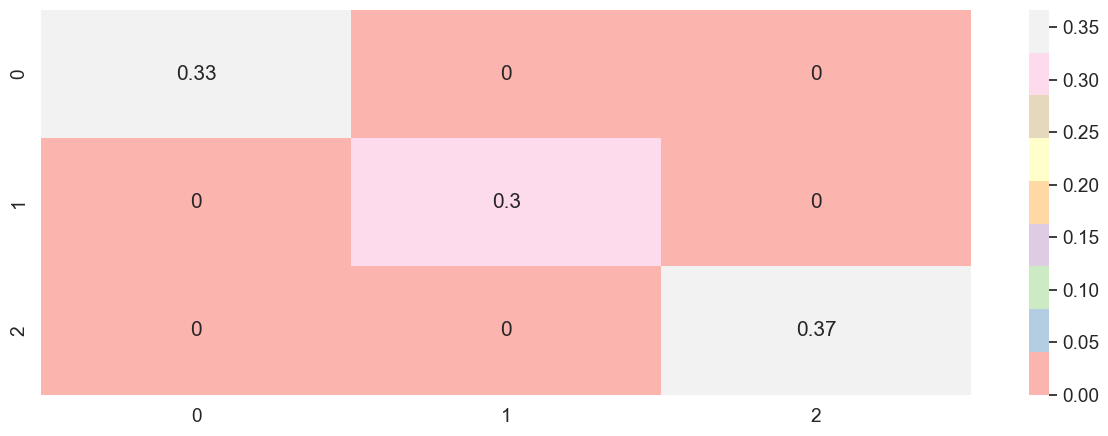

In [35]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

In [40]:
import joblib


In [51]:
import pandas as pd

data = pd.read_csv("C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.csv")


In [52]:
import pandas as pd
import joblib

# Step 1: Load the CSV file into a DataFrame
csv_file_path = "C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.csv"
data = pd.read_csv(csv_file_path)

# Step 2: Save the DataFrame as a .pkl file using joblib
pkl_file_path = "C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.pkl"
joblib.dump(data, pkl_file_path)

print(f"CSV file has been successfully converted to PKL format at {pkl_file_path}")


CSV file has been successfully converted to PKL format at C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.pkl


In [53]:
model = joblib.load("C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.pkl")
# Replace with your model file path

In [68]:
# Check the columns in your dataset
print(df.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')


In [85]:
# Step 2: Prepare features and target variable
# Correct way to define features and target variables

# Drop unnecessary columns for features (X)
X = df.drop(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 
             '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], axis=1)

# Define target variable (y)
y = df['PCOS (Y/N)']  # Only the target column for PCOS diagnosis


In [86]:
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL)  AMH(ng/mL)  
0                    1.99        2.07  
1                    1.99        1.53  
2                  494.08        6.63  
3                    1.99        1.22  
4                  801.45        2.26  


In [87]:
df = df.dropna()  # Remove rows with missing data
# or
df = df.fillna(df.mean())  # Replace missing values with the column mean


In [88]:
df = df.apply(pd.to_numeric, errors='coerce')  # This will convert non-numeric values to NaN
df = df.fillna(df.mean())  # Optionally fill NaN with the column mean


In [92]:
X = df.drop(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 
             '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], axis=1)

In [94]:
print(X_train.shape)
print(y_train.shape)


(432, 0)
(432,)


In [95]:
# Check for missing values in X_train and y_train
print(X_train.isnull().sum())  # for features
print(y_train.isnull().sum())  # for target variable

# If missing values exist, handle them (e.g., using imputation or removal)
X_train = X_train.fillna(X_train.mean())  # Replace NaN with mean for numerical columns
y_train = y_train.fillna(y_train.mode()[0])  # Replace NaN in target with the mode (most frequent value)


Series([], dtype: float64)
0


In [96]:
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric columns to numeric (if any)
encoder = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])

# Ensure the data is numeric and check types
print(X_train.dtypes)


Series([], dtype: object)


In [97]:
# Check the unique values in the target variable (PCOS diagnosis)
print(y_train.unique())


[1 0]


In [98]:
X_train = X_train.values.reshape(-1, 1)  # In case of single feature


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes after splitting
print(X_train.shape)
print(y_train.shape)


(432, 0)
(432,)


In [102]:
# Check for missing values
print(X.isnull().sum())  # For features
print(y.isnull().sum())  # For target

# If you drop rows with NaN values, make sure it doesn't leave the dataset empty
df_clean = df.dropna()  # Drop rows with missing values
print(df_clean.shape)  # Ensure there's still data left


Series([], dtype: float64)
0
(541, 6)


In [117]:
X = df.drop(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], axis=1) # Keep only feature columns
y = df['PCOS (Y/N)']  # Target column

# Verify that the target column is non-empty and correctly formatted
print(y.unique())


[0 1]


In [104]:
print("Original dataset shape:", df.shape)


Original dataset shape: (541, 6)


In [109]:
# Check if X_train and y_train are not empty
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check the first few rows of X_train and y_train
print("First few rows of X_train:")
print(X_train.head())

print("First few rows of y_train:")
print(y_train.head())


X_train shape: (432, 0)
y_train shape: (432,)
First few rows of X_train:
Empty DataFrame
Columns: []
Index: [244, 540, 417, 509, 353]
First few rows of y_train:
244    1
540    1
417    0
509    1
353    0
Name: PCOS (Y/N), dtype: int64


In [110]:
# Check the data types in X_train
print("Data types in X_train:")
print(X_train.dtypes)


Data types in X_train:
Series([], dtype: object)


In [111]:
# Check for missing values in X_train and y_train
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("Missing values in y_train:")
print(y_train.isnull().sum())


Missing values in X_train:
Series([], dtype: float64)
Missing values in y_train:
0


In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('PCOS_infertility.csv')  # Replace with your path

# Handle missing values
df = df.dropna()

# Define features and target
X = df.drop(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], axis=1)
y = df['PCOS (Y/N)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a subset for debugging
X_train_subset = X_train[:100]
y_train_subset = y_train[:100]

# Ensure X_train_subset is numeric
X_train_subset = X_train_subset.apply(pd.to_numeric, errors='coerce')

# Handle NaNs
if X_train_subset.isnull().sum().sum() > 0:
    print("NaN values detected, handling them.")
    X_train_subset = X_train_subset.dropna()

# Ensure y_train_subset is numeric or encoded
if y_train_subset.dtype == 'object':
    label_encoder = LabelEncoder()
    y_train_subset = label_encoder.fit_transform(y_train_subset)

# Convert to numpy arrays
X_train_subset = np.array(X_train_subset)
y_train_subset = np.array(y_train_subset)

# Check data types and shapes
print(f"Shape of X_train_subset: {X_train_subset.shape}")
print(f"Shape of y_train_subset: {y_train_subset.shape}")

# Fit the model
model = RandomForestClassifier(random_state=42)
try:
    model.fit(X_train_subset, y_train_subset)
    print("Model fitting successful!")
except ValueError as e:
    print(f"Error during model fitting: {e}")


Shape of X_train_subset: (100, 0)
Shape of y_train_subset: (100,)
Error during model fitting: Found array with 0 feature(s) (shape=(100, 0)) while a minimum of 1 is required by RandomForestClassifier.


In [120]:
X_train

,Sl. No,Patient File No.,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
244,245,10245,1.99,1.99,4.10
540,541,10541,1.99,1.99,20.00
417,418,10418,1.99,1.99,2.28
509,510,10510,856.11,1.99,16.60
353,354,10354,1082.82,1082.82,3.50
...,...,...,...,...,...
71,72,10072,15.00,1.99,2.58
106,107,10107,1.99,1.99,3.90
270,271,10271,127.04,1.99,4.10
435,436,10436,1399.00,1.99,2.50


In [122]:
y_train

244    1
540    1
417    0
509    1
353    0
      ..
71     0
106    0
270    0
435    0
102    1
Name: PCOS (Y/N), Length: 432, dtype: int64

In [126]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your training data
df = pd.read_csv('PCOS_infertility.csv')  # Replace with your actual file path

# Step 2: Clean column names by stripping spaces
df.columns = df.columns.str.strip()  # Strip any leading/trailing spaces in column names

# Step 3: Convert non-numeric columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (fill with the mean of each column)
df = df.fillna(df.mean())

# Step 4: Prepare features and target variable
X = df.drop('PCOS (Y/N)', axis=1)  # Features
y = df['PCOS (Y/N)']  # Target

# Ensure the target variable is numeric (in case it's categorical)
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Step 5: Ensure there are no missing values in the features or target
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Error: Missing values found in features or target.")
    # You can also choose to handle this better by filling or dropping rows
else:
    print("No missing values found.")

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and y_train are not empty
if X_train.empty or y_train.empty:
    raise ValueError("Training data (X_train or y_train) is empty.")

# Step 7: Train the model (Random Forest example)
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 8: Save the trained model (for later use)
joblib.dump(model, 'C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.pkl')

# Step 9: Example of new input data for prediction
input_data = {
    'age': [28],
    'BMI': [24.5],
    'cycle_length': [30],
    'blood_pressure': [120],
    'follicle_count': [15]
}

input_df = pd.DataFrame(input_data)

# Clean column names of input_df (strip spaces)
input_df.columns = input_df.columns.str.strip()

# Ensure input_df has the same columns as the model expects
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# Step 10: Make the prediction
prediction = model.predict(input_df)  # 0 or 1 indicating PCOS or no PCOS
probability = model.predict_proba(input_df)  # Probability score

# Output the results
print(f"Prediction: {prediction[0]}")
print(f"Probability (PCOS): {probability[0][1]:.2f}")
print(f"Probability (No PCOS): {probability[0][0]:.2f}")


No missing values found.
Prediction: 0
Probability (PCOS): 0.20
Probability (No PCOS): 0.80


In [127]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load your training data
df = pd.read_csv('PCOS_infertility.csv')  # Replace with your actual file path

# Step 2: Convert non-numeric columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (fill with the mean of each column)
df = df.fillna(df.mean())

# Step 3: Prepare features and target variable
X = df.drop('PCOS (Y/N)', axis=1)  # Features
y = df['PCOS (Y/N)']  # Target

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model (Random Forest example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Save the trained model (for later use)
joblib.dump(model, 'C:/Users/user5/OneDrive/Desktop/sap/PCOS_infertility.pkl')

# Step 7: Example of new input data for prediction (random input)
input_data = {
    'age': [28],  # Random example value
    'BMI': [24.5],
    'cycle_length': [30],
    'blood_pressure': [120],
    'follicle_count': [15]
}

input_df = pd.DataFrame(input_data)

# Ensure input_df has the same columns as the model expects
# If the column names don't match the model, use the columns from X
input_df = input_df[X.columns]  # Reorder columns to match the training data

# Step 8: Make the prediction
prediction = model.predict(input_df)  # 0 or 1 indicating PCOS or no PCOS
probability = model.predict_proba(input_df)  # Probability score

# Output the results
print(f"Prediction: {prediction[0]}")
print(f"Probability (PCOS): {probability[0][1]:.2f}")
print(f"Probability (No PCOS): {probability[0][0]:.2f}")


KeyError: "None of [Index(['Sl. No', 'Patient File No.', '  I   beta-HCG(mIU/mL)',\n       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],\n      dtype='object')] are in the [columns]"

In [128]:
input_data = {
    'age': [29], 
    'BMI': [38], 
    'cycle_length': [32],
    'blood_pressure': [115],
    'follicle_count': [12]
}


In [129]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create a random dataset (for demonstration purposes)
# You can replace this with your actual dataset or input data if available
np.random.seed(42)
data = {
    'age': np.random.randint(18, 40, size=100), 
    'BMI': np.random.uniform(18, 40, size=100), 
    'cycle_length': np.random.randint(25, 35, size=100),
    'blood_pressure': np.random.randint(100, 130, size=100),
    'follicle_count': np.random.randint(10, 30, size=100),
    'PCOS (Y/N)': np.random.choice([0, 1], size=100)  # Random target variable (0=No, 1=PCOS)
}

df = pd.DataFrame(data)

# Step 2: Split features and target variable
X = df.drop('PCOS (Y/N)', axis=1)  # Features
y = df['PCOS (Y/N)']  # Target (PCOS or No PCOS)

# Step 3: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Step 4: Now, we prompt the user to input a patient's data
print("Please enter the patient's details:")

# Collecting user input
age = float(input("Age: "))
BMI = float(input("BMI: "))
cycle_length = float(input("Cycle Length: "))
blood_pressure = float(input("Blood Pressure: "))
follicle_count = float(input("Follicle Count: "))

# Step 5: Prepare the input data for prediction
input_data = {
    'age': [age], 
    'BMI': [BMI], 
    'cycle_length': [cycle_length],
    'blood_pressure': [blood_pressure],
    'follicle_count': [follicle_count]
}

input_df = pd.DataFrame(input_data)

# Step 6: Make the prediction
prediction = model.predict(input_df)  # 0 or 1 indicating PCOS or no PCOS
probability = model.predict_proba(input_df)  # Probability score

# Step 7: Output the results
print(f"\nPrediction: {'PCOS' if prediction[0] == 1 else 'No PCOS'}")
print(f"Probability (PCOS): {probability[0][1]:.2f}")
print(f"Probability (No PCOS): {probability[0][0]:.2f}")


Please enter the patient's details:
Age: 29
BMI: 34
Cycle Length: 32
Blood Pressure: 114
Follicle Count: 12

Prediction: No PCOS
Probability (PCOS): 0.08
Probability (No PCOS): 0.92


Enter patient details:
Age: 25
BMI: 14
Cycle Length (days): 115
Blood Pressure (mmHg): 13
Follicle Count: 12
Prediction: PCOS
Probability (PCOS): 0.86
Probability (No PCOS): 0.14


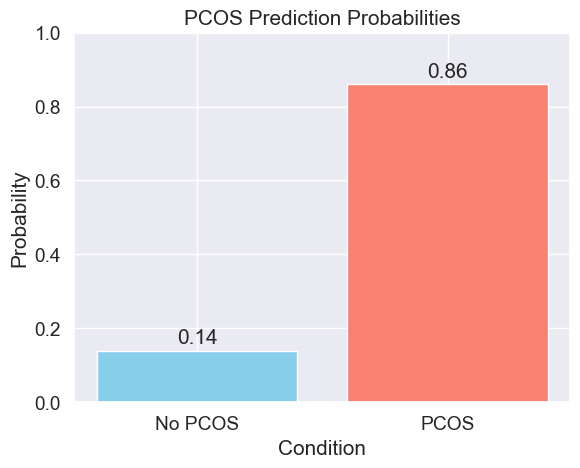

In [130]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Simulate model training (replace this with your actual model)
X_dummy = pd.DataFrame({
    'age': [20, 25, 30, 35, 40],
    'BMI': [22, 28, 32, 35, 24],
    'cycle_length': [28, 30, 32, 27, 29],
    'blood_pressure': [120, 110, 115, 130, 125],
    'follicle_count': [10, 12, 15, 8, 13]
})
y_dummy = [0, 1, 1, 0, 1]  # Dummy PCOS labels (0: No, 1: Yes)

# Train a simple RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_dummy, y_dummy)

# Get user input
print("Enter patient details:")
age = int(input("Age: "))
bmi = float(input("BMI: "))
cycle_length = int(input("Cycle Length (days): "))
blood_pressure = int(input("Blood Pressure (mmHg): "))
follicle_count = int(input("Follicle Count: "))

# Create input DataFrame
input_data = pd.DataFrame({
    'age': [age],
    'BMI': [bmi],
    'cycle_length': [cycle_length],
    'blood_pressure': [blood_pressure],
    'follicle_count': [follicle_count]
})

# Make predictions
prediction = model.predict(input_data)[0]
probabilities = model.predict_proba(input_data)[0]

# Display prediction
print(f"Prediction: {'PCOS' if prediction == 1 else 'No PCOS'}")
print(f"Probability (PCOS): {probabilities[1]:.2f}")
print(f"Probability (No PCOS): {probabilities[0]:.2f}")

# Visualization
labels = ['No PCOS', 'PCOS']
colors = ['skyblue', 'salmon']
plt.bar(labels, probabilities, color=colors)
plt.title('PCOS Prediction Probabilities')
plt.ylabel('Probability')
plt.xlabel('Condition')
plt.ylim(0, 1)  # Set y-axis limit
for i, v in enumerate(probabilities):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()
